In [1]:
rm(list = ls())

In [2]:
library(rvest)
library(xml2)

Loading required package: xml2


In [3]:
tiempo_espera = 5 * 60 # minutos a segundos

In [4]:
#configurando la conexión con el repo
pwd <- scan("pwd_github", "r")
user <- "arturoTellez"
repo <- "github.com/arturoTellez/COVID19.git"

gitadd <- function(){
  cmd = sprintf("git add dashboard-mapa.html dashboard-condiciones.html dashboard-fallecimientos.html dashboard-casos-diarios.html")
  system(cmd)
}

gitcommit <- function(msg = "commit from Rstudio", dir = getwd()){
  cmd = sprintf("git commit -m\"%s\"",msg)
  system(cmd)
}

gitpush <- function(user, pwd, repo){
  cmd = sprintf("git push https://%s:%s@%s master", user, pwd, repo)
  system(cmd)
}


El siguiente segmento de código tiene como proposito automatizar la descarga de los datos y actualizar mapas, para subirlos a github

In [12]:
res <- xml2::read_html("https://www.gob.mx/salud/documentos/datos-abiertos-152127?idiom=es")
fecha_ultimos_datos <- res %>%
                html_nodes(xpath = '/html/body/main/div/div[1]/div[4]/div/table[2]/tbody/tr[1]/td[1]') %>%
                html_text()
fecha_ultimos_datos

[1] "Base de Datos * 13/05/2020"

Loading required package: ggplot2

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message in eval(ei, envir):
“NAs introduced by coercion”

[1] "ORIGEN ORIGEN"
[1] "ORIGEN CLAVE"
[1] "SECTOR SECTOR"
[1] "SECTOR CLAVE"
[1] "ENTIDAD_UM ENTIDADES"
[1] "ENTIDAD_UM CLAVE_ENTIDAD"
[1] "SEXO SEXO"
[1] "SEXO CLAVE"
[1] "ENTIDAD_NAC ENTIDADES"
[1] "ENTIDAD_NAC CLAVE_ENTIDAD"
[1] "ENTIDAD_RES ENTIDADES"
[1] "ENTIDAD_RES CLAVE_ENTIDAD"


Warning message in eval(ei, envir):
“NAs introduced by coercion”

[1] "MUNICIPIO_RES MUNICIPIOS"
[1] "MUNICIPIO_RES CLAVE_MUNICIPIO"
[1] "TIPO_PACIENTE TIPO_PACIENTE"
[1] "TIPO_PACIENTE CLAVE"
[1] "INTUBADO SI_NO"
[1] "INTUBADO CLAVE"
[1] "NEUMONIA SI_NO"
[1] "NEUMONIA CLAVE"
[1] "NACIONALIDAD NACIONALIDAD"
[1] "NACIONALIDAD CLAVE"
[1] "EMBARAZO SI_NO"
[1] "EMBARAZO CLAVE"
[1] "HABLA_LENGUA_INDIG SI_NO"
[1] "HABLA_LENGUA_INDIG CLAVE"
[1] "DIABETES SI_NO"
[1] "DIABETES CLAVE"
[1] "EPOC SI_NO"
[1] "EPOC CLAVE"
[1] "ASMA SI_NO"
[1] "ASMA CLAVE"
[1] "INMUSUPR SI_NO"
[1] "INMUSUPR CLAVE"
[1] "HIPERTENSION SI_NO"
[1] "HIPERTENSION CLAVE"
[1] "OTRAS_COM SI_NO"
[1] "OTRAS_COM CLAVE"
[1] "CARDIOVASCULAR SI_NO"
[1] "CARDIOVASCULAR CLAVE"
[1] "OBESIDAD SI_NO"
[1] "OBESIDAD CLAVE"
[1] "RENAL_CRONICA SI_NO"
[1] "RENAL_CRONICA CLAVE"
[1] "TABAQUISMO SI_NO"
[1] "TABAQUISMO CLAVE"
[1] "OTRO_CASO SI_NO"
[1] "OTRO_CASO CLAVE"
[1] "RESULTADO RESULTADO"
[1] "RESULTADO CLAVE"
[1] "MIGRANTE SI_NO"
[1] "MIGRANTE CLAVE"
[1] "UCI SI_NO"
[1] "UCI CLAVE"


Warning message in readLines(".mapbox_token"):
“incomplete final line found on '.mapbox_token'”Warning message:
“`line.width` does not currently support multiple values.”Warning message:
“`line.width` does not currently support multiple values.”Warning message:
“`line.width` does not currently support multiple values.”Warning message:
“`line.width` does not currently support multiple values.”File is: 0.338 MB


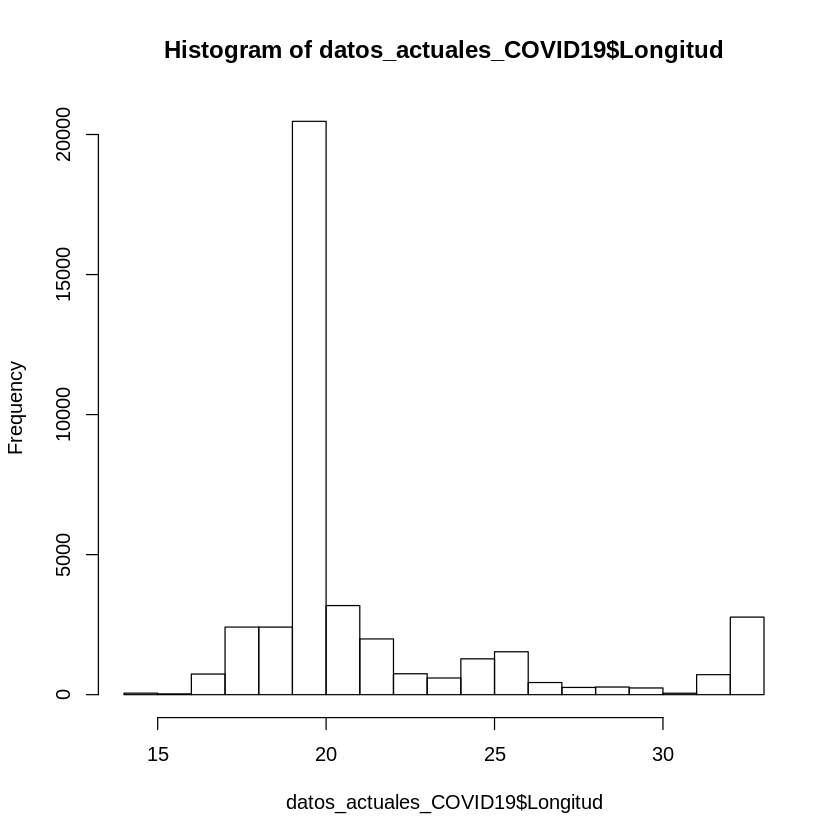

Warning message:
“Ignoring 18 observations”File is: 0.011 MB
A marker object has been specified, but markers is not in the mode
Adding markers to the mode...
File is: 0.006 MB
File is: 0.007 MB
File is: 0.009 MB
File is: 0.009 MB
File is: 0.008 MB


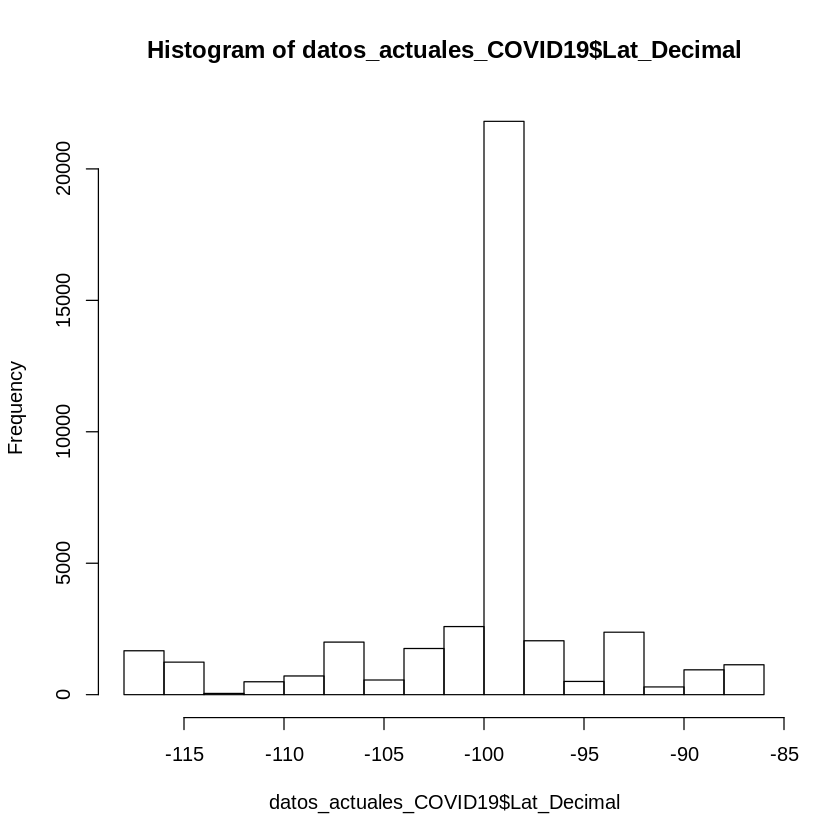

[1] "Se actualizaron los datos a fecha:Base de Datos * 13/05/2020"


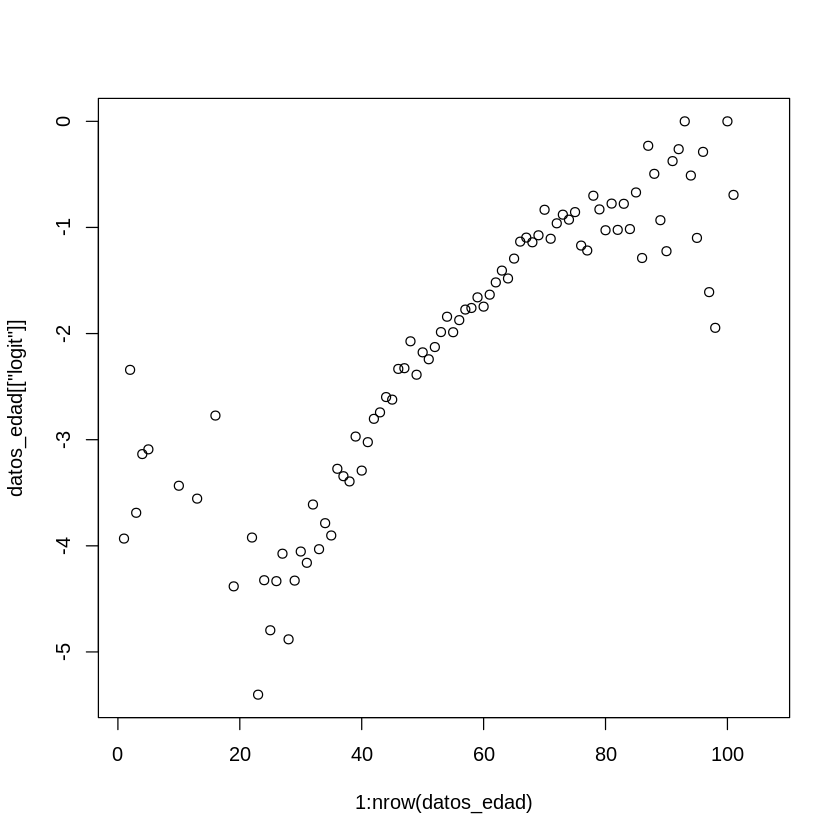

In [6]:
# Se actulizan por primera vez los datos
res <- xml2::read_html("https://www.gob.mx/salud/documentos/datos-abiertos-152127?idiom=es")
fecha_ultimos_datos <- res %>%
                html_nodes(xpath = '/html/body/main/div/div[1]/div[4]/div/table[2]/tbody/tr[1]/td[1]') %>%
                html_text()
source("COVID19.r")



gitadd()
gitcommit(sprintf("Se actualizaron los datos a fecha:%s", fecha_ultimos_datos))
print(sprintf("Se actualizaron los datos a fecha:%s", fecha_ultimos_datos))

gitpush(user, pwd, repo)

In [6]:

gitadd()
gitcommit(sprintf("Se actualizaron los datos a fecha:%s", fecha_ultimos_datos))
print(sprintf("Se actualizaron los datos a fecha:%s", fecha_ultimos_datos))

gitpush(user, pwd, repo)


[1] "Se actualizaron los datos a fecha:13/05/2020"


In [ ]:
 

print(paste("Los datos mas actuales tienen la fecha", fecha_ultimos_datos))
    
while(T){
    res <- xml2::read_html("https://www.gob.mx/salud/documentos/datos-abiertos-152127?idiom=es")
    nueva_fecha <- res %>%
                html_nodes(xpath = '/html/body/main/div/div[1]/div[4]/div/table[2]/tbody/tr[1]/td[1]') %>%
                html_text() 
    if(nueva_fecha != fecha_ultimos_datos){
        fecha_ultimos_datos = nueva_fecha
        source("COVID19.r")
        gitadd()
        gitcommit(sprintf("Se actualizaron los datos a fecha:%s", nueva_fecha))
        print(sprintf("Se actualizaron los datos a fecha:%s", nueva_fecha))
        
        gitpush(user, pwd, repo)
    }
    flush.console()
#     flush(stdout())
    print(paste("Los datos mas actuales tienen la fecha", fecha_ultimos_datos))
    Sys.sleep(tiempo_espera)
}
    